## PDS Group 7

### Import Libraries

This notebook analyzes US vital statistics data on drug and alcohol-induced mortality from 2003 to 2015. We load the data from multiple text files, clean and standardize it, and prepare it for analysis by handling missing values, removing duplicates, and converting data types appropriately.

In [1]:
import requests
import zipfile
import io
import pandas as pd
import numpy as np

pd.set_option("mode.copy_on_write", True)

### Load and Combine Data from Multiple Years

In [2]:
url = "https://www.dropbox.com/scl/fi/bnkoej224ve1tr35fhek8/US_VitalStatistics.zip?rlkey=oenpdsvsiovlqw7v7j1yhldye&dl=1"

# Download ZIP file into memory
resp = requests.get(url)
resp.raise_for_status()
zip_bytes = io.BytesIO(resp.content)

dfs = []

# Open ZIP and read data files
with zipfile.ZipFile(zip_bytes, "r") as zf:
    # Filter out metadata and resource fork files
    txt_files = [
        name
        for name in zf.namelist()
        if name.lower().endswith(".txt")
        and "__macosx" not in name.lower()
        and "/._" not in name
    ]

    for name in sorted(txt_files):
        print("Reading:", name)
        with zf.open(name) as f:
            df = pd.read_csv(f, sep="\t", encoding="latin1")
            dfs.append(df)

# Combine all years into one DataFrame
mortality_03_15 = pd.concat(dfs, ignore_index=True)

print("Number of files read:", len(dfs))
print("Final dataframe shape:", mortality_03_15.shape)
mortality_03_15.sample(20)

Reading: Underlying Cause of Death, 2003.txt
Reading: Underlying Cause of Death, 2004.txt
Reading: Underlying Cause of Death, 2005.txt
Reading: Underlying Cause of Death, 2006.txt
Reading: Underlying Cause of Death, 2007.txt
Reading: Underlying Cause of Death, 2008.txt
Reading: Underlying Cause of Death, 2009.txt
Reading: Underlying Cause of Death, 2010.txt
Reading: Underlying Cause of Death, 2011.txt
Reading: Underlying Cause of Death, 2012.txt
Reading: Underlying Cause of Death, 2013.txt
Reading: Underlying Cause of Death, 2014.txt
Reading: Underlying Cause of Death, 2015.txt
Number of files read: 13
Final dataframe shape: (57436, 8)


,Notes,County,County Code,Year,Year Code,Drug/Alcohol Induced Cause,Drug/Alcohol Induced Cause Code,Deaths
17468,NaN,"Clarke County, GA",13059.0,2007.0,2007.0,All other non-drug and non-alcohol causes,O9,618.0
2475,NaN,"Tioga County, NY",36107.0,2003.0,2003.0,All other non-drug and non-alcohol causes,O9,442.0
11412,NaN,"Wyoming County, PA",42131.0,2005.0,2005.0,All other non-drug and non-alcohol causes,O9,289.0
17352,NaN,"Lee County, FL",12071.0,2007.0,2007.0,All other non-drug and non-alcohol causes,O9,5662.0
39042,NaN,"Pulaski County, AR",5119.0,2012.0,2012.0,Drug poisonings (overdose) Unintentional (X40-...,D1,29.0
17567,NaN,"Oglethorpe County, GA",13221.0,2007.0,2007.0,All other non-drug and non-alcohol causes,O9,112.0
49020,NaN,"Henderson County, IL",17071.0,2014.0,2014.0,All other non-drug and non-alcohol causes,O9,86.0
4075,NaN,"Natrona County, WY",56025.0,2003.0,2003.0,All other alcohol-induced causes,A9,12.0
37941,NaN,"Sullivan County, TN",47163.0,2011.0,2011.0,All other alcohol-induced causes,A9,10.0
26695,NaN,"Decatur County, IA",19053.0,2009.0,2009.0,All other non-drug and non-alcohol causes,O9,92.0


### Initial Data Exploration

In [3]:
mortality_03_15.columns

Index(['Notes', 'County', 'County Code', 'Year', 'Year Code',
       'Drug/Alcohol Induced Cause', 'Drug/Alcohol Induced Cause Code',
       'Deaths'],
      dtype='object')

In [4]:
mortality_03_15.isna().sum()

Notes                              57241
County                               195
County Code                          195
Year                                 195
Year Code                            195
Drug/Alcohol Induced Cause           195
Drug/Alcohol Induced Cause Code      195
Deaths                               195
dtype: int64

In [5]:
mortality_03_15.duplicated().sum()

np.int64(183)

In [6]:
mortality_03_15[mortality_03_15.duplicated()]

,Notes,County,County Code,Year,Year Code,Drug/Alcohol Induced Cause,Drug/Alcohol Induced Cause Code,Deaths
4094,---,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4096,---,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4101,---,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8237,---,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8238,"Dataset: Underlying Cause of Death, 1999-2017",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
57431,Suggested Citation: Centers for Disease Contro...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57432,"1999-2017 on CDC WONDER Online Database, relea...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
57433,compiled from data provided by the 57 vital st...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57434,at http://wonder.cdc.gov/ucd-icd10.html on Oct...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleaning

In [7]:
# Remove duplicate rows
mortality_03_15_clean = mortality_03_15.drop_duplicates()
mortality_03_15_clean.tail()

,Notes,County,County Code,Year,Year Code,Drug/Alcohol Induced Cause,Drug/Alcohol Induced Cause Code,Deaths
57416,NaN,"Sweetwater County, WY",56037.0,2015.0,2015.0,All other non-drug and non-alcohol causes,O9,251
57417,NaN,"Teton County, WY",56039.0,2015.0,2015.0,All other non-drug and non-alcohol causes,O9,95
57418,NaN,"Uinta County, WY",56041.0,2015.0,2015.0,All other non-drug and non-alcohol causes,O9,142
57419,NaN,"Washakie County, WY",56043.0,2015.0,2015.0,All other non-drug and non-alcohol causes,O9,81
57420,NaN,"Weston County, WY",56045.0,2015.0,2015.0,All other non-drug and non-alcohol causes,O9,61


In [8]:
mortality_03_15_clean.drop(columns="Notes", inplace=True)

In [9]:
mortality_03_15_clean

,County,County Code,Year,Year Code,Drug/Alcohol Induced Cause,Drug/Alcohol Induced Cause Code,Deaths
0,"Autauga County, AL",1001.0,2003.0,2003.0,All other non-drug and non-alcohol causes,O9,397.0
1,"Baldwin County, AL",1003.0,2003.0,2003.0,Drug poisonings (overdose) Unintentional (X40-...,D1,10.0
2,"Baldwin County, AL",1003.0,2003.0,2003.0,All other alcohol-induced causes,A9,14.0
3,"Baldwin County, AL",1003.0,2003.0,2003.0,All other non-drug and non-alcohol causes,O9,1479.0
4,"Barbour County, AL",1005.0,2003.0,2003.0,All other non-drug and non-alcohol causes,O9,287.0
...,...,...,...,...,...,...,...
57416,"Sweetwater County, WY",56037.0,2015.0,2015.0,All other non-drug and non-alcohol causes,O9,251
57417,"Teton County, WY",56039.0,2015.0,2015.0,All other non-drug and non-alcohol causes,O9,95
57418,"Uinta County, WY",56041.0,2015.0,2015.0,All other non-drug and non-alcohol causes,O9,142
57419,"Washakie County, WY",56043.0,2015.0,2015.0,All other non-drug and non-alcohol causes,O9,81


In [10]:
mortality_03_15_clean.isna().sum()

County                             12
County Code                        12
Year                               12
Year Code                          12
Drug/Alcohol Induced Cause         12
Drug/Alcohol Induced Cause Code    12
Deaths                             12
dtype: int64

In [11]:
mortality_03_15_clean[mortality_03_15_clean.isnull().any(axis=1)]

,County,County Code,Year,Year Code,Drug/Alcohol Induced Cause,Drug/Alcohol Induced Cause Code,Deaths
4087,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4088,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4090,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4092,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4093,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4095,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4097,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4098,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
mortality_03_15_clean.dropna(how="all")

,County,County Code,Year,Year Code,Drug/Alcohol Induced Cause,Drug/Alcohol Induced Cause Code,Deaths
0,"Autauga County, AL",1001.0,2003.0,2003.0,All other non-drug and non-alcohol causes,O9,397.0
1,"Baldwin County, AL",1003.0,2003.0,2003.0,Drug poisonings (overdose) Unintentional (X40-...,D1,10.0
2,"Baldwin County, AL",1003.0,2003.0,2003.0,All other alcohol-induced causes,A9,14.0
3,"Baldwin County, AL",1003.0,2003.0,2003.0,All other non-drug and non-alcohol causes,O9,1479.0
4,"Barbour County, AL",1005.0,2003.0,2003.0,All other non-drug and non-alcohol causes,O9,287.0
...,...,...,...,...,...,...,...
57416,"Sweetwater County, WY",56037.0,2015.0,2015.0,All other non-drug and non-alcohol causes,O9,251
57417,"Teton County, WY",56039.0,2015.0,2015.0,All other non-drug and non-alcohol causes,O9,95
57418,"Uinta County, WY",56041.0,2015.0,2015.0,All other non-drug and non-alcohol causes,O9,142
57419,"Washakie County, WY",56043.0,2015.0,2015.0,All other non-drug and non-alcohol causes,O9,81


In [13]:
# Drop rows where all columns (except the first) are null
mortality_03_15_clean = mortality_03_15_clean.dropna(
    how="all", subset=mortality_03_15.columns[1:]
)

In [14]:
mortality_03_15_clean.isna().sum()

County                             0
County Code                        0
Year                               0
Year Code                          0
Drug/Alcohol Induced Cause         0
Drug/Alcohol Induced Cause Code    0
Deaths                             0
dtype: int64

In [15]:
# Check for unusual placeholder values in columns
for col in mortality_03_15_clean.columns:
    uniques = mortality_03_15_clean[col].astype(str).unique()
    unusual = [
        u
        for u in uniques
        if u.strip().lower()
        in ["missing", "n/a", "na", "none", ".", "null", "suppressed", ""]
    ]
    if unusual:
        print(f"{col}: {unusual}")

Deaths: ['Missing']


In [16]:
mortality_03_15_clean[mortality_03_15_clean["Deaths"] == "Missing"]

,County,County Code,Year,Year Code,Drug/Alcohol Induced Cause,Drug/Alcohol Induced Cause Code,Deaths
52756,"Prince of Wales-Outer Ketchikan Census Area, AK",2201.0,2015.0,2015.0,Drug poisonings (overdose) Unintentional (X40-...,D1,Missing
52757,"Prince of Wales-Outer Ketchikan Census Area, AK",2201.0,2015.0,2015.0,Drug poisonings (overdose) Suicide (X60-X64),D2,Missing
52758,"Prince of Wales-Outer Ketchikan Census Area, AK",2201.0,2015.0,2015.0,Drug poisonings (overdose) Homicide (X85),D3,Missing
52759,"Prince of Wales-Outer Ketchikan Census Area, AK",2201.0,2015.0,2015.0,Drug poisonings (overdose) Undetermined (Y10-Y14),D4,Missing
52760,"Prince of Wales-Outer Ketchikan Census Area, AK",2201.0,2015.0,2015.0,All other drug-induced causes,D9,Missing
52761,"Prince of Wales-Outer Ketchikan Census Area, AK",2201.0,2015.0,2015.0,"Alcohol poisonings (overdose) (X45, X65, Y15)",A1,Missing
52762,"Prince of Wales-Outer Ketchikan Census Area, AK",2201.0,2015.0,2015.0,All other alcohol-induced causes,A9,Missing
52763,"Prince of Wales-Outer Ketchikan Census Area, AK",2201.0,2015.0,2015.0,All other non-drug and non-alcohol causes,O9,Missing
52765,"Skagway-Hoonah-Angoon Census Area, AK",2232.0,2015.0,2015.0,Drug poisonings (overdose) Unintentional (X40-...,D1,Missing
52766,"Skagway-Hoonah-Angoon Census Area, AK",2232.0,2015.0,2015.0,Drug poisonings (overdose) Suicide (X60-X64),D2,Missing


In [17]:
# Replace "Missing" with NaN in Deaths column
mortality_03_15_clean["Deaths"] = mortality_03_15_clean["Deaths"].replace(
    "Missing", np.nan
)

### Remove Redundant Columns

In [18]:
# Check if Year and Year Code are identical
(mortality_03_15_clean["Year"] == mortality_03_15_clean["Year Code"]).all()

np.True_

In [19]:
mortality_03_15_clean.drop(columns="Year Code", inplace=True)

### Data Type Conversion

In [20]:
mortality_03_15_clean.dtypes

County                              object
County Code                        float64
Year                               float64
Drug/Alcohol Induced Cause          object
Drug/Alcohol Induced Cause Code     object
Deaths                              object
dtype: object

In [21]:
mask = ~mortality_03_15_clean["Year"].astype(str).str.match(r"^\d{4}\.0$")
mortality_03_15_clean.loc[mask, "Year"].unique()

array([], dtype=float64)

In [22]:
# Convert columns to appropriate data types
mortality_03_15_clean = mortality_03_15_clean.astype(
    {
        "County": "string",
        "County Code": "int",
        "Year": "float",
        "Drug/Alcohol Induced Cause": "string",
        "Drug/Alcohol Induced Cause Code": "string",
        "Deaths": "float",
    }
)

In [23]:
# Convert Year and Deaths to nullable integer types
mortality_03_15_clean = mortality_03_15_clean.astype(
    {
        "Year": "Int64",
        "Deaths": "Int64",
    }
)

In [24]:
mortality_03_15_clean.dtypes

County                             string[python]
County Code                                 int64
Year                                        Int64
Drug/Alcohol Induced Cause         string[python]
Drug/Alcohol Induced Cause Code    string[python]
Deaths                                      Int64
dtype: object

### Final Cleaned Dataset

In [25]:
mortality_03_15_clean.head()

,County,County Code,Year,Drug/Alcohol Induced Cause,Drug/Alcohol Induced Cause Code,Deaths
0,"Autauga County, AL",1001,2003,All other non-drug and non-alcohol causes,O9,397
1,"Baldwin County, AL",1003,2003,Drug poisonings (overdose) Unintentional (X40-...,D1,10
2,"Baldwin County, AL",1003,2003,All other alcohol-induced causes,A9,14
3,"Baldwin County, AL",1003,2003,All other non-drug and non-alcohol causes,O9,1479
4,"Barbour County, AL",1005,2003,All other non-drug and non-alcohol causes,O9,287


## After looking at the population dataset

In [26]:
population = pd.read_csv("data/clean/population_2000_2024.csv")

In [27]:
population

,STATE,COUNTY,STNAME,CTYNAME,year,population,fips
0,1,1,Alabama,Autauga County,2000,44021,1001
1,1,1,Alabama,Autauga County,2001,44889,1001
2,1,1,Alabama,Autauga County,2002,45909,1001
3,1,1,Alabama,Autauga County,2003,46800,1001
4,1,1,Alabama,Autauga County,2004,48366,1001
...,...,...,...,...,...,...,...
81708,56,45,Wyoming,Weston County,2020,6817,56045
81709,56,45,Wyoming,Weston County,2021,6747,56045
81710,56,45,Wyoming,Weston County,2022,6872,56045
81711,56,45,Wyoming,Weston County,2023,6828,56045


In [28]:
population["fips"].dtype

dtype('int64')

In [29]:
# Check str len
mortality_03_15_clean["County Code"].astype(str).str.len().value_counts()

County Code
5    50411
4     6830
Name: count, dtype: int64

In [30]:
# Since len for County Code differs, fix before merging
mortality_03_15_clean["County Code"] = (
    mortality_03_15_clean["County Code"].astype(str).str.zfill(5)
)

mortality_03_15_clean["County Code"].str.len().value_counts()

County Code
5    57241
Name: count, dtype: int64

In [31]:
# Check str len
population["fips"].astype(str).str.len().value_counts()

fips
5    73487
4     8226
Name: count, dtype: int64

In [32]:
population["fips"] = population["fips"].astype(str).str.zfill(5)

In [33]:
population["fips"].str.len().value_counts()

fips
5    81713
Name: count, dtype: int64

In [34]:
population.head()

,STATE,COUNTY,STNAME,CTYNAME,year,population,fips
0,1,1,Alabama,Autauga County,2000,44021,01001
1,1,1,Alabama,Autauga County,2001,44889,01001
2,1,1,Alabama,Autauga County,2002,45909,01001
3,1,1,Alabama,Autauga County,2003,46800,01001
4,1,1,Alabama,Autauga County,2004,48366,01001


In [35]:
# missing_pop["County Code"].unique()
# These FIPS codes are independent county-equivalents that DO NOT appear in the modern Census population datasets.

In [36]:
obsolete_fips = [
    "02201",
    "02232",
    "02280",
    "02270",
    "46113",
    "51515",
    "51560",
]  # Alaska, South Daktoa, Virgina

mortality_03_15_clean = mortality_03_15_clean[
    ~mortality_03_15_clean["County Code"].isin(obsolete_fips)
]

In [ ]:
pop_mortality_merged = population.merge(
    mortality_03_15_clean,
    left_on=["fips", "year"],
    right_on=["County Code", "Year"],
    how="left",
)

pop_mortality_merged

,STATE,COUNTY,STNAME,CTYNAME,year,population,fips,County,County Code,Year,Drug/Alcohol Induced Cause,Drug/Alcohol Induced Cause Code,Deaths
0,1,1,Alabama,Autauga County,2000,44021,01001,<NA>,NaN,<NA>,<NA>,<NA>,<NA>
1,1,1,Alabama,Autauga County,2001,44889,01001,<NA>,NaN,<NA>,<NA>,<NA>,<NA>
2,1,1,Alabama,Autauga County,2002,45909,01001,<NA>,NaN,<NA>,<NA>,<NA>,<NA>
3,1,1,Alabama,Autauga County,2003,46800,01001,"Autauga County, AL",01001,2003,All other non-drug and non-alcohol causes,O9,397
4,1,1,Alabama,Autauga County,2004,48366,01001,"Autauga County, AL",01001,2004,All other non-drug and non-alcohol causes,O9,373
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99910,56,45,Wyoming,Weston County,2020,6817,56045,<NA>,NaN,<NA>,<NA>,<NA>,<NA>
99911,56,45,Wyoming,Weston County,2021,6747,56045,<NA>,NaN,<NA>,<NA>,<NA>,<NA>
99912,56,45,Wyoming,Weston County,2022,6872,56045,<NA>,NaN,<NA>,<NA>,<NA>,<NA>
99913,56,45,Wyoming,Weston County,2023,6828,56045,<NA>,NaN,<NA>,<NA>,<NA>,<NA>


In [45]:
pop_mortality_merged["population"].isna().sum()

np.int64(0)

In [46]:
pop_mortality_merged["Deaths"].isna().sum()

np.int64(38356)

In [48]:
missing_data_counties = pop_mortality_merged[pop_mortality_merged["Deaths"].isna()]
missing_data_counties

,STATE,COUNTY,STNAME,CTYNAME,year,population,fips,County,County Code,Year,Drug/Alcohol Induced Cause,Drug/Alcohol Induced Cause Code,Deaths
0,1,1,Alabama,Autauga County,2000,44021,01001,<NA>,NaN,<NA>,<NA>,<NA>,<NA>
1,1,1,Alabama,Autauga County,2001,44889,01001,<NA>,NaN,<NA>,<NA>,<NA>,<NA>
2,1,1,Alabama,Autauga County,2002,45909,01001,<NA>,NaN,<NA>,<NA>,<NA>,<NA>
17,1,1,Alabama,Autauga County,2016,55243,01001,<NA>,NaN,<NA>,<NA>,<NA>,<NA>
18,1,1,Alabama,Autauga County,2017,55390,01001,<NA>,NaN,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99910,56,45,Wyoming,Weston County,2020,6817,56045,<NA>,NaN,<NA>,<NA>,<NA>,<NA>
99911,56,45,Wyoming,Weston County,2021,6747,56045,<NA>,NaN,<NA>,<NA>,<NA>,<NA>
99912,56,45,Wyoming,Weston County,2022,6872,56045,<NA>,NaN,<NA>,<NA>,<NA>,<NA>
99913,56,45,Wyoming,Weston County,2023,6828,56045,<NA>,NaN,<NA>,<NA>,<NA>,<NA>


## Analyzing Missing Data by Population Size

### Step 1: Separate counties with and without mortality data

In [51]:
# Counties WITH mortality data
counties_with_data = pop_mortality_merged[pop_mortality_merged["Deaths"].notna()]

# Counties WITHOUT mortality data (missing)
counties_without_data = pop_mortality_merged[pop_mortality_merged["Deaths"].isna()]

print(f"Rows with data: {len(counties_with_data):,}")
print(f"Rows without data: {len(counties_without_data):,}")

Rows with data: 61,559
Rows without data: 38,356


### Step 2: Compare population statistics

In [52]:
# Population stats for counties WITH data
print("Counties WITH mortality data:")
print(f"  Mean population: {counties_with_data['population'].mean():,.0f}")
print(f"  Median population: {counties_with_data['population'].median():,.0f}")
print(f"  Min population: {counties_with_data['population'].min():,.0f}")
print(f"  Max population: {counties_with_data['population'].max():,.0f}")

print("\nCounties WITHOUT mortality data (missing):")
print(f"  Mean population: {counties_without_data['population'].mean():,.0f}")
print(f"  Median population: {counties_without_data['population'].median():,.0f}")
print(f"  Min population: {counties_without_data['population'].min():,.0f}")
print(f"  Max population: {counties_without_data['population'].max():,.0f}")

Counties WITH mortality data:
  Mean population: 236,944
  Median population: 50,990
  Min population: 641
  Max population: 10,085,416

Counties WITHOUT mortality data (missing):
  Mean population: 99,939
  Median population: 25,006
  Min population: 46
  Max population: 10,105,708


### Step 3: Visualize both distributions side by side

/var/folders/s5/m8gf98wx5cz9783d91z25bjh0000gn/T/ipykernel_51464/2716367160.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(


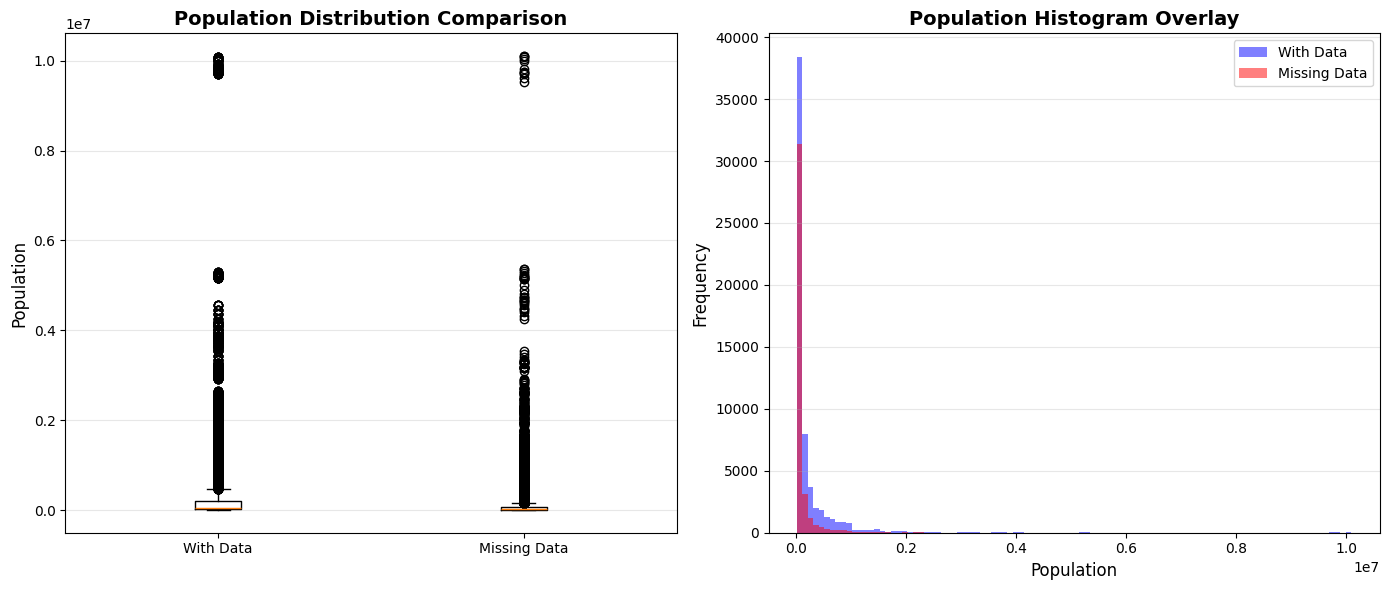

In [57]:
# Box plot comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box plot
axes[0].boxplot(
    [counties_with_data["population"], counties_without_data["population"]],
    labels=["With Data", "Missing Data"],
)
axes[0].set_ylabel("Population", fontsize=12)
axes[0].set_title("Population Distribution Comparison", fontsize=14, fontweight="bold")
axes[0].grid(axis="y", alpha=0.3)

# Histogram overlay
axes[1].hist(
    counties_with_data["population"],
    bins=100,
    alpha=0.5,
    label="With Data",
    color="blue",
)
axes[1].hist(
    counties_without_data["population"],
    bins=100,
    alpha=0.5,
    label="Missing Data",
    color="red",
)
axes[1].set_xlabel("Population", fontsize=12)
axes[1].set_ylabel("Frequency", fontsize=12)
axes[1].set_title("Population Histogram Overlay", fontsize=14, fontweight="bold")
axes[1].legend()
axes[1].grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

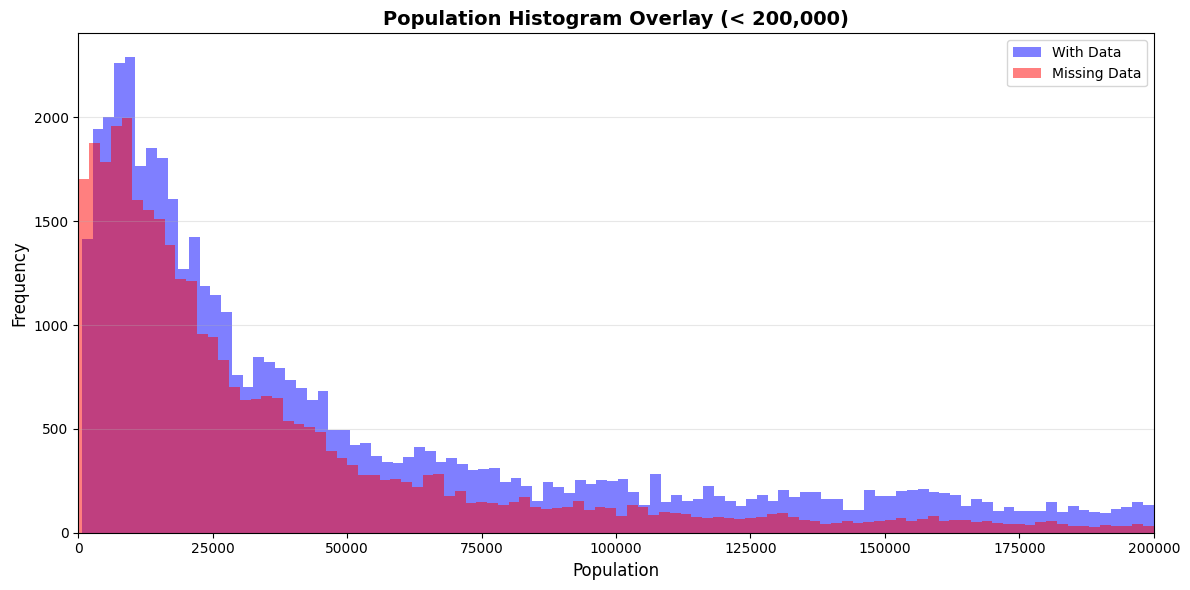

In [58]:
# Zoomed-in histogram for populations below 200,000
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(
    counties_with_data[counties_with_data["population"] < 200000]["population"],
    bins=100,
    alpha=0.5,
    label="With Data",
    color="blue",
)
ax.hist(
    counties_without_data[counties_without_data["population"] < 200000]["population"],
    bins=100,
    alpha=0.5,
    label="Missing Data",
    color="red",
)
ax.set_xlabel("Population", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
ax.set_title("Population Histogram Overlay (< 200,000)", fontsize=14, fontweight="bold")
ax.set_xlim(0, 200000)
ax.legend()
ax.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

### Step 4: Look at percentiles to find potential threshold

In [54]:
# Calculate percentiles for missing data counties
percentiles = [10, 25, 50, 75, 90, 95, 99]

print("Population percentiles for counties WITHOUT data (missing):")
for p in percentiles:
    value = counties_without_data["population"].quantile(p / 100)
    print(f"  {p}th percentile: {value:,.0f}")

Population percentiles for counties WITHOUT data (missing):
  10th percentile: 4,341
  25th percentile: 10,336
  50th percentile: 25,006
  75th percentile: 65,870
  90th percentile: 204,271
  95th percentile: 430,663
  99th percentile: 1,257,737


### Step 5: Calculate average population per county and check impact of different thresholds

In [55]:
# Calculate average population per county-year
avg_pop_per_county = pop_mortality_merged.groupby("fips")["population"].mean()

# Test different thresholds
thresholds = [5000, 10000, 20000, 30000, 50000]

print("Impact of different population thresholds:\n")
for threshold in thresholds:
    counties_below = (avg_pop_per_county < threshold).sum()
    counties_above = (avg_pop_per_county >= threshold).sum()
    pct_removed = (counties_below / len(avg_pop_per_county)) * 100

    print(f"Threshold: {threshold:,}")
    print(f"  Counties below: {counties_below}")
    print(f"  Counties above: {counties_above}")
    print(f"  % removed: {pct_removed:.1f}%")
    print()

Impact of different population thresholds:

Threshold: 5,000
  Counties below: 308
  Counties above: 2848
  % removed: 9.8%

Threshold: 10,000
  Counties below: 714
  Counties above: 2442
  % removed: 22.6%

Threshold: 20,000
  Counties below: 1318
  Counties above: 1838
  % removed: 41.8%

Threshold: 30,000
  Counties below: 1724
  Counties above: 1432
  % removed: 54.6%

Threshold: 50,000
  Counties below: 2176
  Counties above: 980
  % removed: 68.9%

